In [22]:
from videoreader import VideoReader
import matplotlib.pyplot as plt
import yaml
import rich
import numpy as np


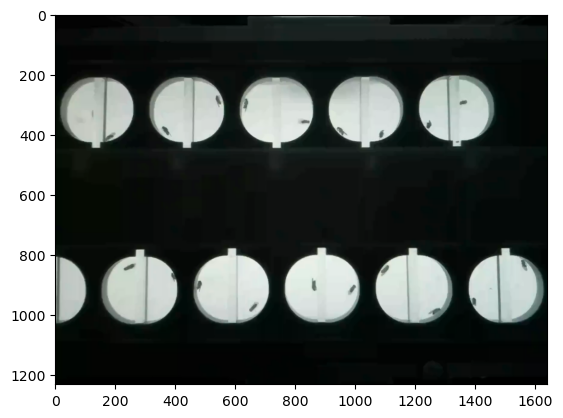

In [23]:
vr = VideoReader("playback/dat/rpi9-20210409_093149/rpi9-20210409_093149.mp4")
frame = vr[0]
plt.imshow(frame)

In [24]:
with open("playback/dat/rpi9-20210409_093149/rpi9-20210409_093149_analysis.yaml", mode="r") as f:
    d = yaml.load(f, Loader=yaml.SafeLoader)

rich.print(d)


{
    'Animals': {
        'angles': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        'centers': [
            [485.0, 901.0],
            [390.0, 876.0],
            [655.0, 976.0],
            [246.0, 851.0],
            [856.1996161228407, 900.8752399232244],
            [1105.0, 854.0],
            [985.0, 916.0],
            [1268.5604606525912, 985.8656429942416],
            [632.7063339731286, 296.4990403071016],
            [824.7216890595009, 365.750479846449],
            [368.29174664107484, 381.48944337811884],
            [183.0, 410.0],
            [531.9769673704415, 280.76007677543174],
            [953.7811900191938, 387.7850287907868],
            [1089.1362763915547, 400.3761996161227],
            [1243.3781190019195, 368.898272552783],
            [1362.9942418426103, 293.35124760076764],
            [1397.619961612284, 957.5355086372359],
            [1561.3051823416506, 844.2149712092129]
        ],
        'geometries': [
            'point',
            'point',
            'point',
            'point',
            'point',
            'point',
            'point',
            'point',
            'point',
            'point',
            'point',
            'point',
            'point',
            'point',
            'point',
            'point',
            'point',
            'point',
            'point'
        ],
        'nb_rois': 19,
        'positions': [
            [475.0, 891.0],
            [380.0, 866.0],
            [645.0, 966.0],
            [236.0, 841.0],
            [846.1996161228407, 890.8752399232244],
            [1095.0, 844.0],
            [975.0, 906.0],
            [1258.5604606525912, 975.8656429942416],
            [622.7063339731286, 286.4990403071016],
            [814.7216890595009, 355.750479846449],
            [358.29174664107484, 371.48944337811884],
            [173.0, 400.0],
            [521.9769673704415, 270.76007677543174],
            [943.7811900191938, 377.7850287907868],
            [1079.1362763915547, 390.3761996161227],
            [1233.3781190019195, 358.898272552783],
            [1352.9942418426103, 283.35124760076764],
            [1387.619961612284, 947.5355086372359],
            [1551.3051823416506, 834.2149712092129]
        ],
        'sizes': [
            [20.0, 20.0],
            [20.0, 20.0],
            [20.0, 20.0],
            [20.0, 20.0],
            [20.0, 20.0],
            [20.0, 20.0],
            [20.0, 20.0],
            [20.0, 20.0],
            [20.0, 20.0],
            [20.0, 20.0],
            [20.0, 20.0],
            [20.0, 20.0],
            [20.0, 20.0],
            [20.0, 20.0],
            [20.0, 20.0],
            [20.0, 20.0],
            [20.0, 20.0],
            [20.0, 20.0],
            [20.0, 20.0]
        ]
    },
    'Chambers': {
        'angles': [-42.57578688946541, 49.760414186729854, 0],
        'centers': [
            [607.4217566625002, 942.9435738158353],
            [134.18467086743988, 314.99715676272257],
            [1374.0, 55.0]
        ],
        'geometries': ['rectangle', 'ellipse', 'led'],
        'nb_rois': 3,
        'positions': [
            [436.2343516427512, 957.6361693184823],
            [112.3327816299793, 185.45760706166118],
            [1324.0, 0.0]
        ],
        'sizes': [
            [272.0, 210.0],
            [226.27416997969522, 135.76450198781714],
            [100.75526727182765, 110.43602481303242]
        ]
    },
    'Jobs': {
        'analyses_profiles': 'tracker and deepposekit and sleap.yaml',
        'sleap': {
            'modelname': '../snakemake-workflows/sleap/models/backlight',
            'tracking.clean_instance_count': 10,
            'tracking.match': 'hungarian',
            'tracking.similarity': 'instance',
            'tracking.track_window': 15,
            'tracking.tracker': 'flow'
        }
    }
}

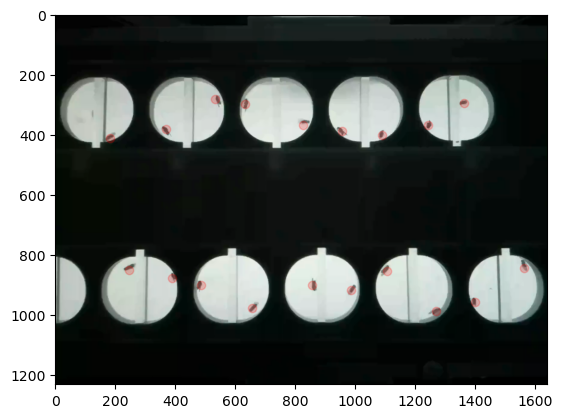

In [25]:
plt.imshow(frame)
for center in d["Animals"]["centers"]:
    plt.plot(center[0], center[1], "or", alpha=0.2)


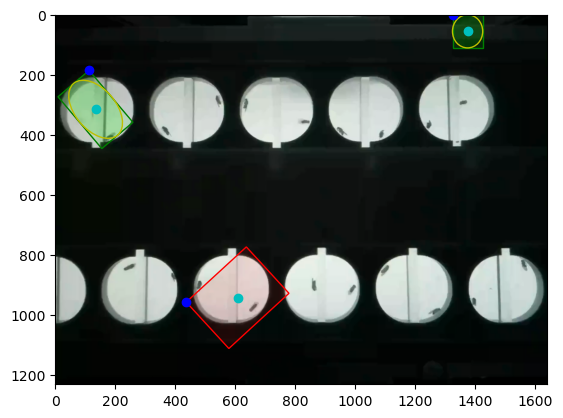

In [26]:
ax = plt.gca()
plt.imshow(frame)
from matplotlib.patches import Rectangle, Ellipse

for cn in range(d["Chambers"]["nb_rois"]):
    if d["Chambers"]["geometries"][cn] == "rectangle":
        chamber = Rectangle(
            xy=d["Chambers"]["positions"][cn],  # lower left corner before rotation is applied
            width=d["Chambers"]["sizes"][cn][0],
            height=d["Chambers"]["sizes"][cn][1],
            angle=d["Chambers"]["angles"][cn],
            facecolor=[1.0,0,0,.1],
            edgecolor='r',
        )
    elif d["Chambers"]["geometries"][cn] in ["ellipse", "led"]:
        as_rect = Rectangle(
            xy=np.array(d["Chambers"]["positions"][cn]),
            width=d["Chambers"]["sizes"][cn][0],
            height=d["Chambers"]["sizes"][cn][1],
            angle=d["Chambers"]["angles"][cn],
            facecolor=[0,1.0,0,.1],
            edgecolor='g',
        )
        ax.add_patch(as_rect)

        chamber = Ellipse(
            xy=np.array(d["Chambers"]["centers"][cn]),  # important - pyplot ellipses are defined with rel. to the center 
            width=d["Chambers"]["sizes"][cn][0],
            height=d["Chambers"]["sizes"][cn][1],
            angle=d["Chambers"]["angles"][cn],
            facecolor=[0,1.0,0,.1],
            edgecolor='y',
        )
    ax.add_patch(chamber)
    plt.plot(d["Chambers"]["positions"][cn][0], d["Chambers"]["positions"][cn][1], 'ob')
    plt.plot(d["Chambers"]["centers"][cn][0], d["Chambers"]["centers"][cn][1], 'oc')
    